In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.neural_network import MLPClassifier


# Load Data

First step is to ingest all the data we have available and merge them into a flattened datastructure containing all measurements. Indexes are ignored and rewritten to allow all readings to be added to the DF:

In [2]:
# parse the labels.csv
labels = pd.read_csv('labels.csv', index_col=0)

# grab filenames from the data directory
filenames = os.listdir('data')

dataframes = []

# parse and concatenate all csv files into df
for filename in filenames:
  if filename.endswith('.csv'):
    batch = pd.read_csv(os.path.join('data',filename), index_col=0)
    batch['batch'] = int(filename.replace('.csv', ''))
    dataframes.append(batch)

df = pd.concat(dataframes, ignore_index=True)

# print(df[:10])


In [3]:
# add label column (if it is not already available)
if (not 'label' in df.columns):
  df = df.merge(labels, left_on=["batch"], right_on=["id"])

def time_to_float(inputstr):
  hours, minutes, seconds = map(float, inputstr.split(':'))

  # return hours * 3600 + minutes * 60 + seconds
  # this is sufficient because hours should always be 0
  return minutes * 60 + seconds

if (not df['label'].dtype == 'category'):
  df['label'] = df['label'].astype('category')
if (not df['zeit'].dtype == 'float64'):
  df['zeit'] = df['zeit'].apply(time_to_float)

# print(df[:10])
# print(df['label'].value_counts())


# Test Data Preprocessing

In [4]:
X = df[['zeit','messwert','sensorid']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print(X_train[:10])
# print(y_train[:10])


# Modelling

In [5]:
cnn_clf = make_pipeline(MinMaxScaler(), MLPClassifier(verbose=True, hidden_layer_sizes=(16,16,), max_iter=1000, tol=1e-5, random_state=42))
cnn_clf.fit(X_train, y_train)


Iteration 1, loss = 1.09790417
Iteration 2, loss = 1.09732705
Iteration 3, loss = 1.09729812
Iteration 4, loss = 1.09727995
Iteration 5, loss = 1.09724390
Iteration 6, loss = 1.09721913
Iteration 7, loss = 1.09720184
Iteration 8, loss = 1.09718631
Iteration 9, loss = 1.09716863
Iteration 10, loss = 1.09716655


/home/nimblebyte/workspace/.venv/lib64/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(16, 16), max_iter=1000,
                               random_state=42, tol=1e-05, verbose=True))])

# Evaluation

0.3505529797608525


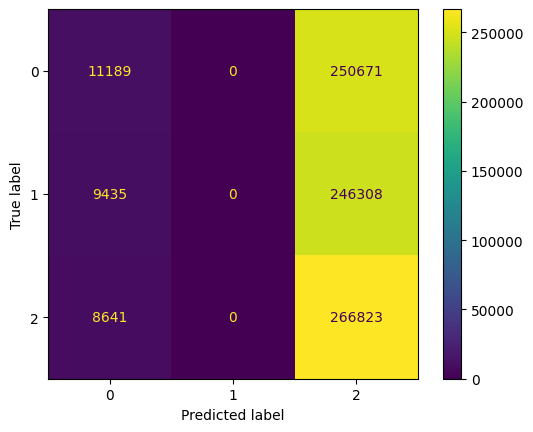

In [ ]:
cnn_y_pred = cnn_clf.predict(X_test)

cnn_acc = accuracy_score(y_test, cnn_y_pred)
print(cnn_acc)

cnn_cm = confusion_matrix(y_test, cnn_y_pred, labels=cnn_clf.classes_)
cnn_disp = ConfusionMatrixDisplay(confusion_matrix=cnn_cm, display_labels=cnn_clf.classes_)
cnn_disp.plot()
plt.show()
